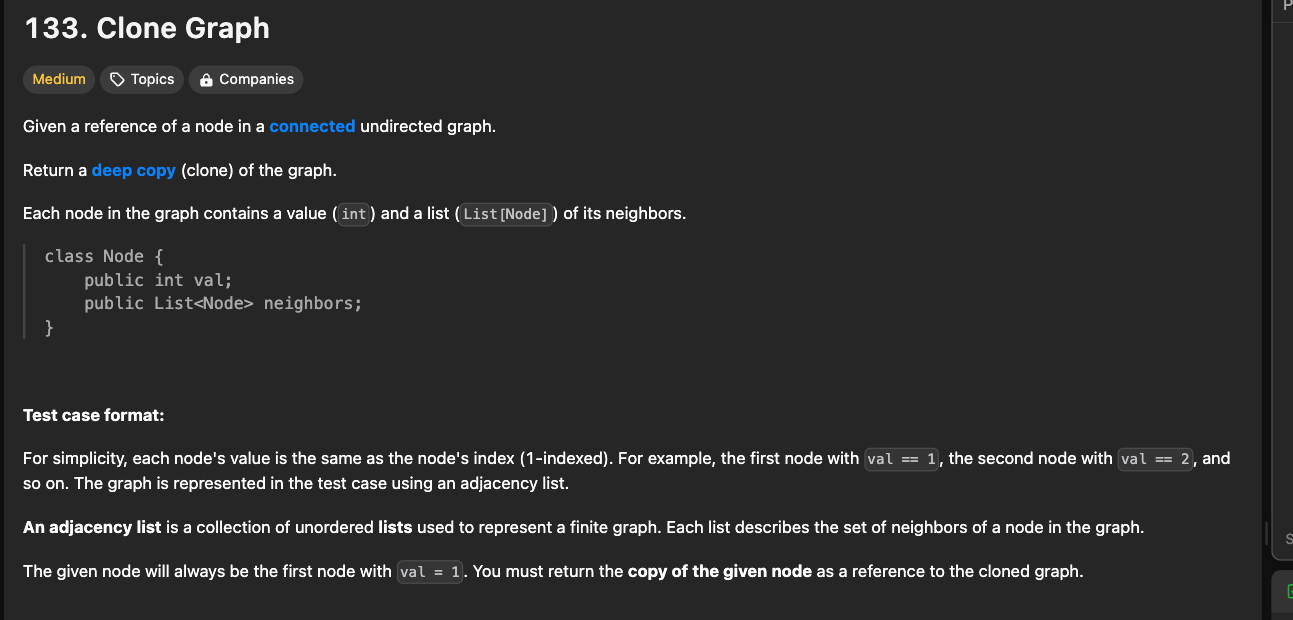

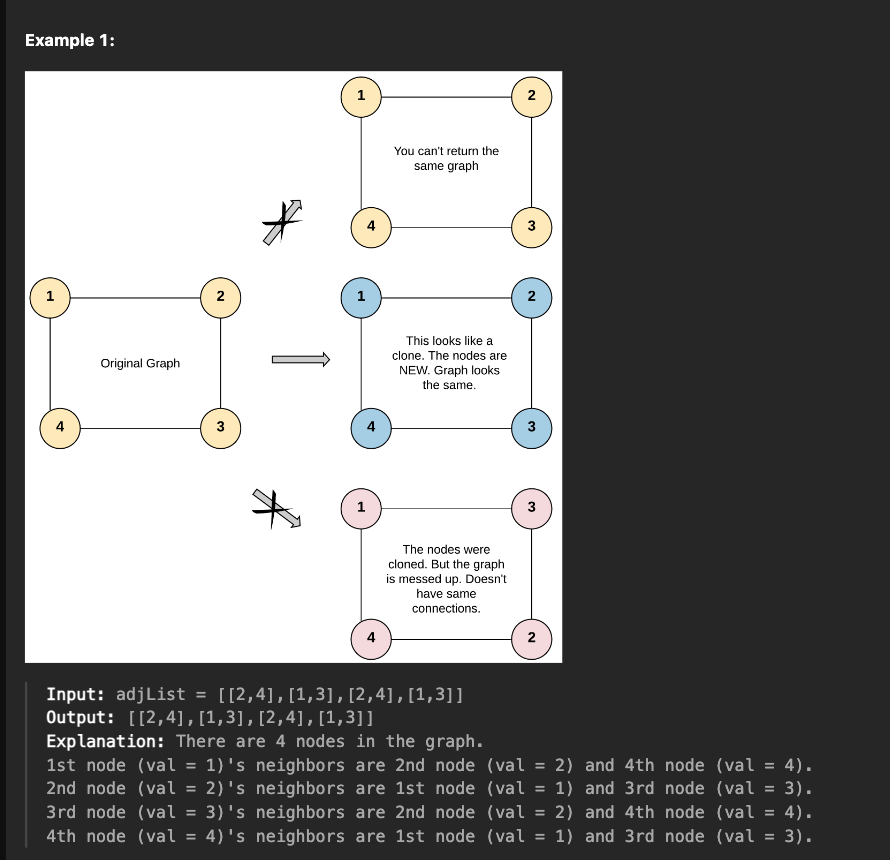

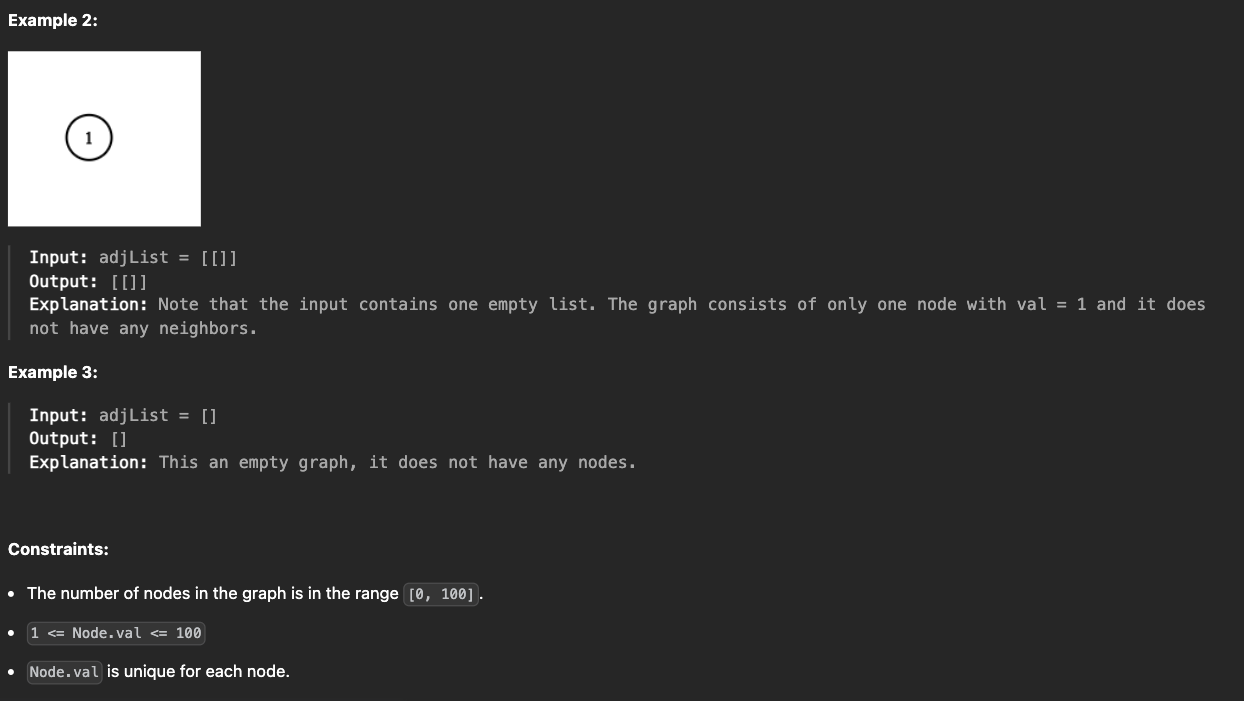

In [6]:
# %load lc_133_clone_graph.py
import queue
from typing import Optional


class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        if node is None:
            return None
        seen = [None]*101

        q = queue.Queue()
        
        first_node = Node(val=node.val, neighbors=node.neighbors)
        seen[node.val] = first_node
        
        q.put(first_node)
        while not q.empty():
            n = q.get()
            
            neighbors = []
            for neighbor in n.neighbors:
                if seen[neighbor.val] is not None:
                    neighbors.append(seen[neighbor.val])
                else:
                    new_node = Node(val=neighbor.val, neighbors=neighbor.neighbors) if neighbor is not None else None
                    neighbors.append(new_node)
                    q.put(new_node)
                    seen[new_node.val] = new_node
            n.neighbors = neighbors
            
        return first_node
        
        
class Main:
    def __init__(self):
        self.solution = Solution()

    def create_graph(self, graph):
        if not graph:
            return None

        node_dict = {}
        for i in range(len(graph)):
            node_dict[i+1] = Node(i+1)

        for i in range(len(graph)):
            node_dict[i+1].neighbors = [node_dict[n] for n in graph[i]]

        return node_dict[1]  # Return the first node

    def print_graph(self, node):
        printed = set()
        self._dfs_print(node, printed)

    def _dfs_print(self, node, printed):
        if node in printed:
            return
        printed.add(node)
        print(node.val, [n.val for n in node.neighbors])
        for n in node.neighbors:
            self._dfs_print(n, printed)

    def test_solution(self):
        test_cases = [
            ([[]], []),
            ([[2, 4], [1, 3], [2, 4], [1, 3]], [[2, 4], [1, 3], [2, 4], [1, 3]])
        ]

        for graph, _ in test_cases:
            node = self.create_graph(graph)
            clone = self.solution.cloneGraph(node)
            print("Original graph:")
            self.print_graph(node)
            print("Cloned graph:")
            self.print_graph(clone)
            print("---")


if __name__ == "__main__":
    main = Main()
    main.test_solution()

Original graph:
1 []
Cloned graph:
1 []
---
Original graph:
1 [2, 4]
2 [1, 3]
3 [2, 4]
4 [1, 3]
Cloned graph:
1 [2, 4]
2 [1, 3]
3 [2, 4]
4 [1, 3]
---
